In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [2]:
df = pd.read_csv("training data.csv")

In [3]:
df.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_date,accident_site,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,M,1.0,85,38301,1,1,Rent,12/16/2016,Local,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,21,F,0.0,75,30445,0,1,Rent,2/12/2015,Highway,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,49,F,0.0,87,38923,0,1,Own,12/6/2016,Local,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,58,F,1.0,58,40605,1,0,Own,5/5/2016,Local,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,38,M,1.0,95,36380,1,0,Rent,10/27/2015,Highway,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [4]:
df.info

<bound method DataFrame.info of        age_of_driver gender  marital_status  safty_rating  annual_income  \
0                 46      M             1.0            85          38301   
1                 21      F             0.0            75          30445   
2                 49      F             0.0            87          38923   
3                 58      F             1.0            58          40605   
4                 38      M             1.0            95          36380   
...              ...    ...             ...           ...            ...   
17993             69      M             1.0            93          42338   
17994             35      F             0.0            22          35579   
17995             27      F             1.0            81          32953   
17996             52      F             1.0            86          39519   
17997             61      F             0.0            60          41126   

       high_education_ind  address_change_ind living_st

In [5]:
df.shape

(17998, 19)

In [6]:
df.isnull().sum()

age_of_driver               0
gender                      0
marital_status              5
safty_rating                0
annual_income               0
high_education_ind          0
address_change_ind          0
living_status               0
claim_date                  0
accident_site               0
channel                     0
policy_report_filed_ind     0
claim_est_payout           17
age_of_vehicle              8
vehicle_category            0
vehicle_price               0
vehicle_color               0
vehicle_weight              0
fraud                       0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df['claim_date'] = df['claim_date'].str[-4:].astype(int)

In [9]:
df.isnull().sum()

age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
claim_date                 0
accident_site              0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
fraud                      0
dtype: int64

In [10]:
df.shape

(17968, 19)

Text(0, 0.5, 'fraud')

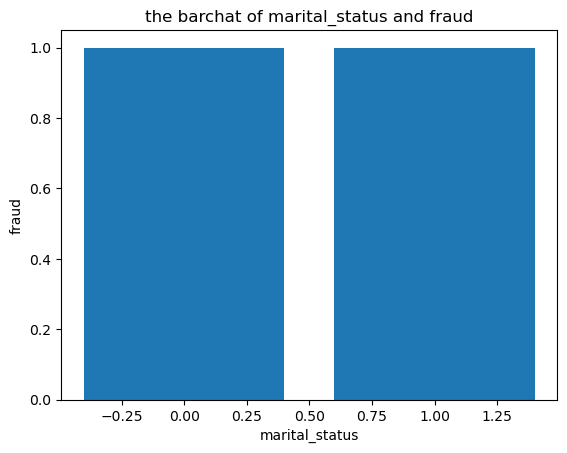

In [11]:
plt.bar(df.marital_status,df.fraud)
plt.title('the barchat of marital_status and fraud')
plt.xlabel('marital_status')
plt.ylabel('fraud')

<Axes: xlabel='marital_status', ylabel='count'>

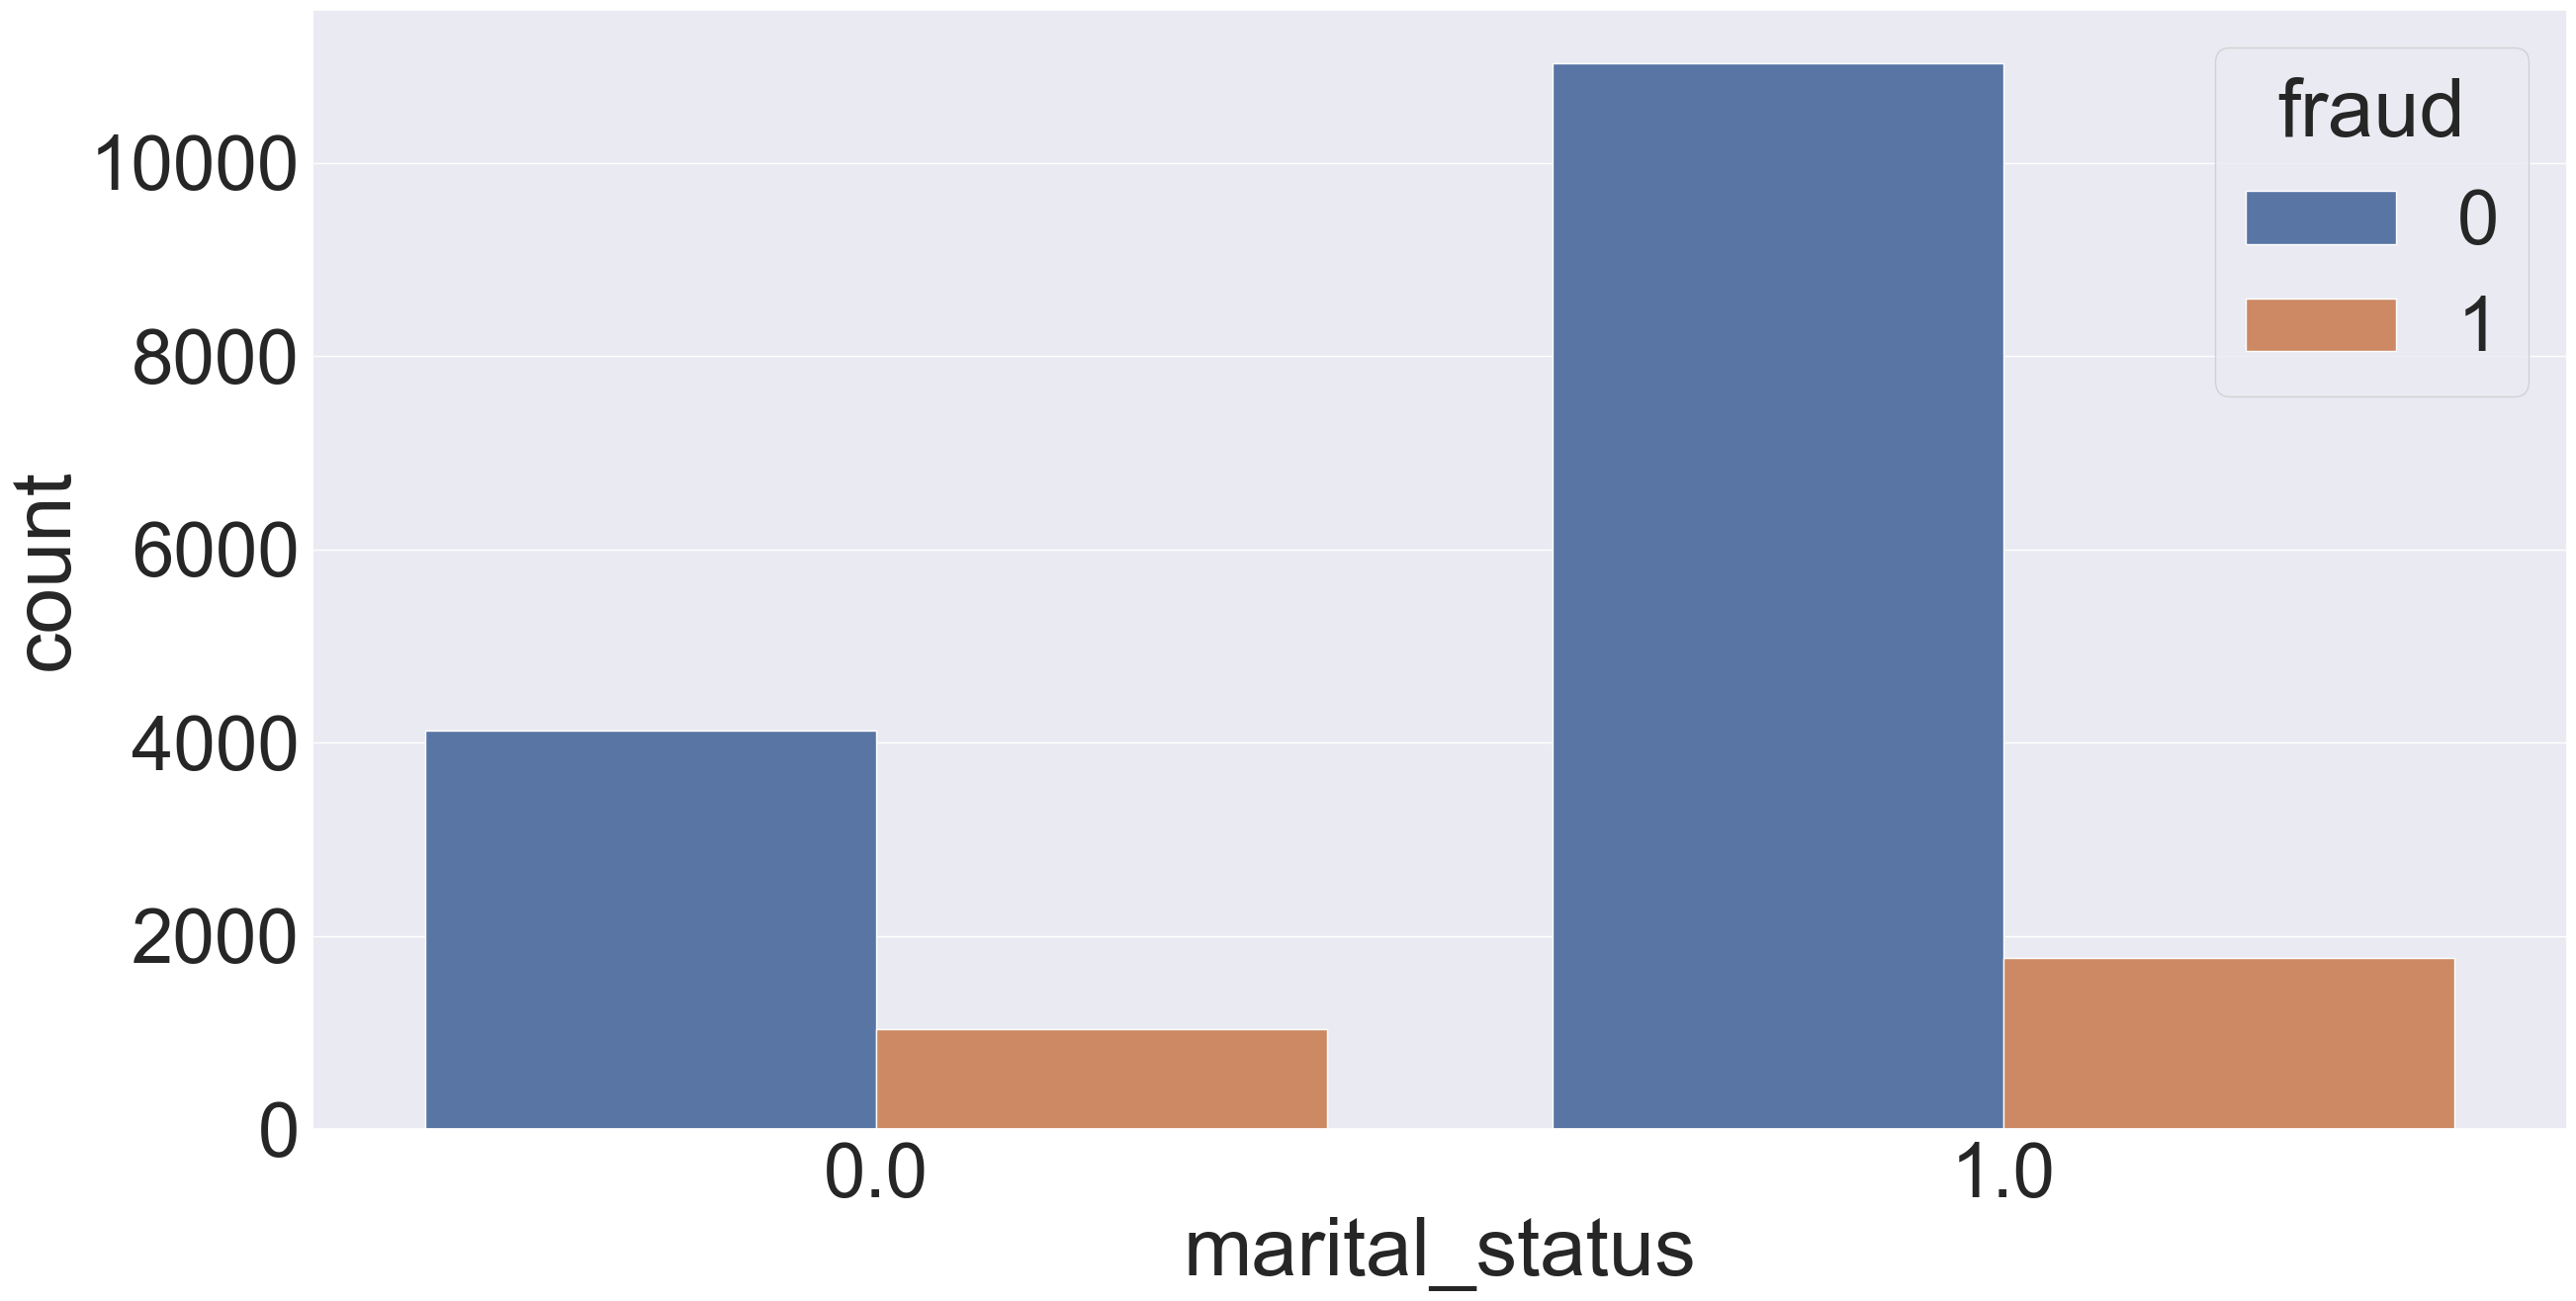

In [12]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(x=df['marital_status'],hue=df['fraud'])


<Axes: xlabel='gender', ylabel='count'>

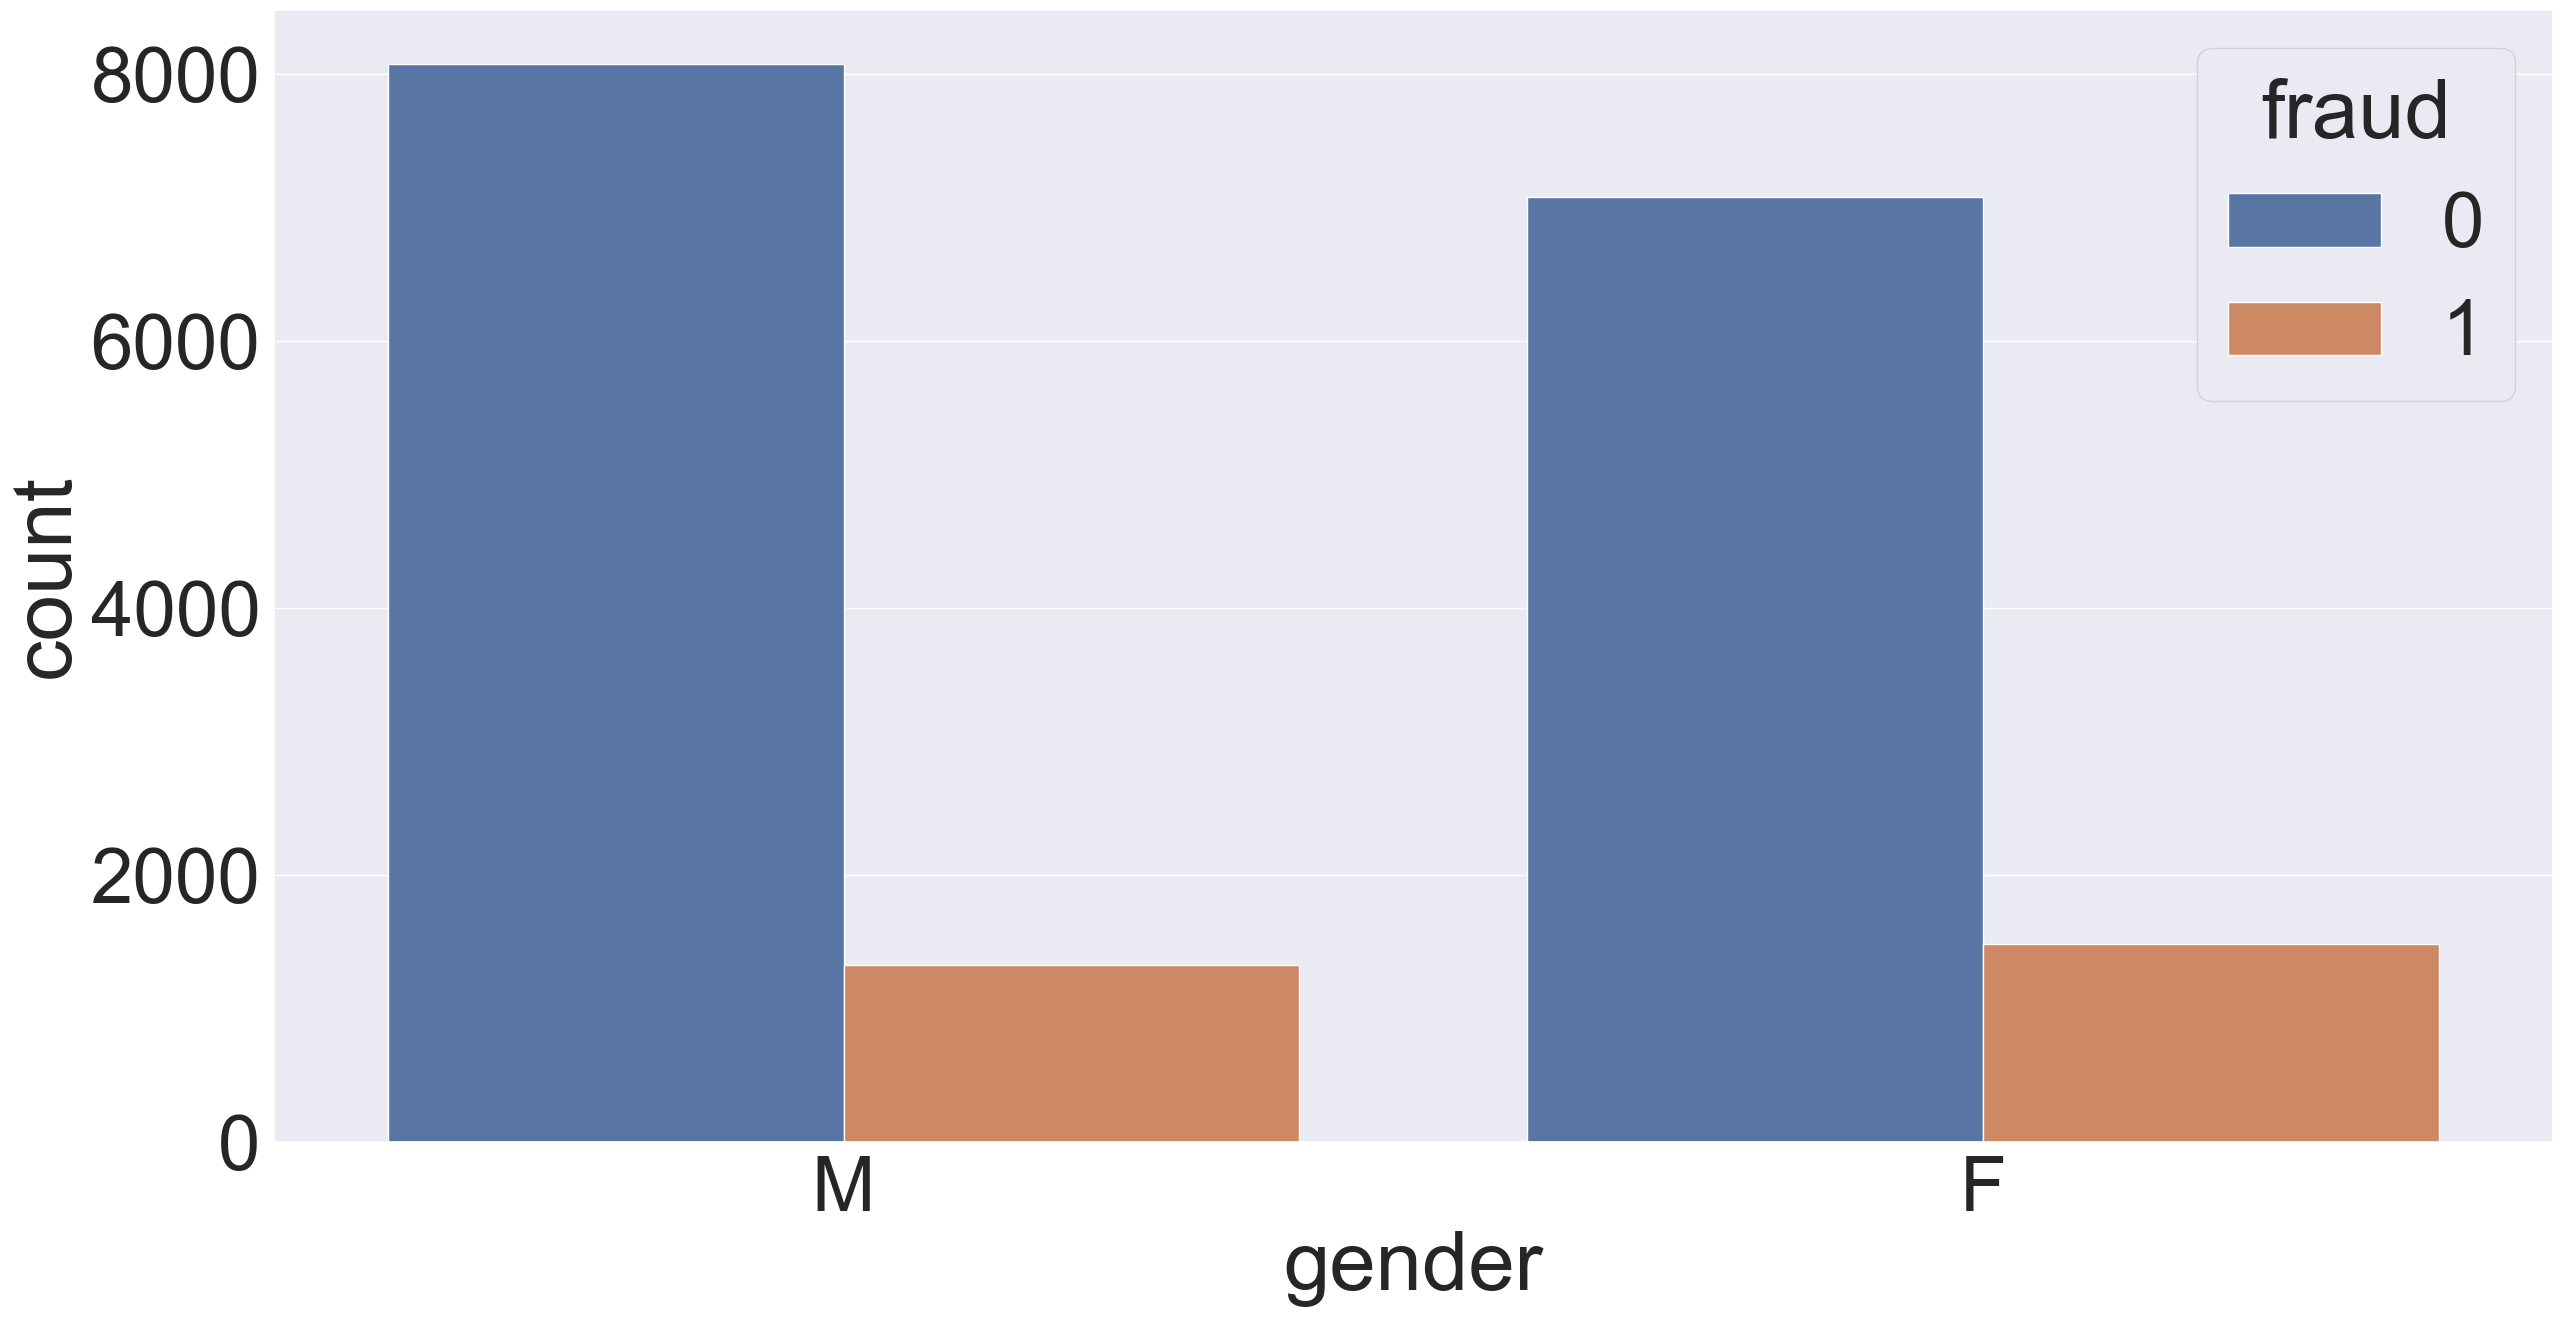

In [13]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(x=df['gender'],hue=df['fraud'])


In [14]:
df.gender=df.gender.map({'M':1,'F':0})
df['gender'].value_counts()

gender
1    9401
0    8567
Name: count, dtype: int64

In [15]:
df.channel=df.channel.map({'Phone':2,'Broker':0,'Online':1})
df['channel'].value_counts()

channel
0    9615
2    5763
1    2590
Name: count, dtype: int64

In [16]:
df.vehicle_color=df.vehicle_color.map({'white':2,'black':0,'gray':1,'red':3,'blue':4,'silver':5,'other':6})
df['vehicle_color'].value_counts()

vehicle_color
0    2617
5    2614
2    2579
3    2561
4    2545
1    2543
6    2509
Name: count, dtype: int64

In [17]:
df.head(20)

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_date,accident_site,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,1,1.0,85,38301,1,1,Rent,2016,Local,0,0,7530.940993,9.0,Compact,12885.452350,2,16161.333810,0
1,21,0,0.0,75,30445,0,1,Rent,2015,Highway,1,0,2966.024895,4.0,Large,29429.452180,2,28691.964220,0
2,49,0,0.0,87,38923,0,1,Own,2016,Local,0,0,6283.888333,3.0,Compact,21701.181950,2,22090.947580,1
3,58,0,1.0,58,40605,1,0,Own,2016,Local,0,1,6169.747994,4.0,Medium,13198.273440,6,38329.581060,1
4,38,1,1.0,95,36380,1,0,Rent,2015,Highway,0,0,4541.387150,7.0,Medium,38060.211220,1,25876.563190,0
5,56,0,0.0,72,40240,0,0,Own,2016,Highway,2,0,5388.645056,4.0,Medium,17688.204980,0,15234.082040,1
6,27,1,1.0,80,32952,1,0,Rent,2015,Parking Lot,1,1,8960.072399,7.0,Compact,26411.536820,3,28994.538680,0
7,40,1,1.0,79,36891,1,1,Own,2016,Local,1,1,13844.364900,8.0,Medium,11355.270130,6,34045.830280,0
8,45,0,0.0,86,38069,0,1,Own,2015,Parking Lot,0,0,6038.501514,5.0,Compact,49267.970710,0,23206.508040,0
9,31,1,1.0,80,34324,0,1,Rent,2015,Parking Lot,0,0,5869.947858,5.0,Large,19929.785770,2,37277.759100,0


In [18]:
df.living_status=df.living_status.map({'Rent':0,'Own':1})
df['living_status'].value_counts()

living_status
1    9952
0    8016
Name: count, dtype: int64

In [19]:
df.vehicle_category=df.vehicle_category.map({'Large':2,'Compact':0,'Medium':1})
df['vehicle_category'].value_counts()

vehicle_category
0    6053
2    5972
1    5943
Name: count, dtype: int64

In [20]:
df.accident_site=df.accident_site.map({'Local':2,'Highway':0,'Parking Lot':1})
df['accident_site'].value_counts()

accident_site
2    8757
1    5460
0    3751
Name: count, dtype: int64

In [21]:
df.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_date,accident_site,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,1,1.0,85,38301,1,1,0,2016,2,0,0,7530.940993,9.0,0,12885.45235,2,16161.33381,0
1,21,0,0.0,75,30445,0,1,0,2015,0,1,0,2966.024895,4.0,2,29429.45218,2,28691.96422,0
2,49,0,0.0,87,38923,0,1,1,2016,2,0,0,6283.888333,3.0,0,21701.18195,2,22090.94758,1
3,58,0,1.0,58,40605,1,0,1,2016,2,0,1,6169.747994,4.0,1,13198.27344,6,38329.58106,1
4,38,1,1.0,95,36380,1,0,0,2015,0,0,0,4541.387150,7.0,1,38060.21122,1,25876.56319,0


In [22]:
X = df.drop(columns=['fraud'])

In [23]:
X

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_date,accident_site,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,46,1,1.0,85,38301,1,1,0,2016,2,0,0,7530.940993,9.0,0,12885.452350,2,16161.33381
1,21,0,0.0,75,30445,0,1,0,2015,0,1,0,2966.024895,4.0,2,29429.452180,2,28691.96422
2,49,0,0.0,87,38923,0,1,1,2016,2,0,0,6283.888333,3.0,0,21701.181950,2,22090.94758
3,58,0,1.0,58,40605,1,0,1,2016,2,0,1,6169.747994,4.0,1,13198.273440,6,38329.58106
4,38,1,1.0,95,36380,1,0,0,2015,0,0,0,4541.387150,7.0,1,38060.211220,1,25876.56319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,69,1,1.0,93,42338,1,0,1,2015,2,0,0,4806.841803,6.0,1,32144.571850,0,16868.53410
17994,35,0,0.0,22,35579,1,1,1,2015,2,2,1,4089.794471,3.0,1,9468.510601,4,31500.99689
17995,27,0,1.0,81,32953,0,1,0,2016,2,1,1,2225.803056,5.0,1,64974.369590,0,44536.25506
17996,52,0,1.0,86,39519,1,0,1,2015,0,0,1,9560.744844,3.0,0,24983.268110,2,50093.75959


In [24]:
y = df['fraud']

In [25]:
y

0        0
1        0
2        1
3        1
4        0
        ..
17993    0
17994    1
17995    0
17996    0
17997    0
Name: fraud, Length: 17968, dtype: int64

In [26]:
X.shape

(17968, 18)

In [27]:
y.shape

(17968,)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [29]:
model = DecisionTreeClassifier()

In [30]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
predictions =model.predict(X_test)
scores = accuracy_score(y_test, predictions)
scores

0.741513633834168

In [32]:
predictions =model.predict(X_test)
scores = precision_score(y_test, predictions)
scores

0.20933977455716588

In [33]:
predictions =model.predict(X_test)
scores = f1_score(y_test, predictions)
scores

0.21867115222876368

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [35]:
lr.score(X_test,y_test)

0.8419588202559822

In [36]:
lr_pred=lr.predict(X_test)

In [37]:
lr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
import pickle
pickle.dump(lr, open('insurancefraudmodel.pkl','wb'))